In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [10]:
# --- USER CONFIGURATION ---
user_fraction = 0.90   # PERCENTAGE OF DATA TO USE FOR TRAINING (e.g., 0.70 means first 70% of days)
degree = 3            # DEGREE OF POLYNOMIAL (2=Parabola, 3=Cubic Curve, etc.)


try:
    df = pd.read_csv('../Linear_regression/covid_data_clean_with_new_cases.csv')
except FileNotFoundError:
    print("ERROR: File not found. Please check the path.")
    print("Attempted to load: 'covid_data_clean_with_new_cases.csv'")
    # Create an empty DataFrame to prevent errors in the next cell
    df = pd.DataFrame() 

targets = ['Confirmed', 'Cured', 'Deaths', 'New_Confirmed', 'New_Cured', 'New_Deaths']

--- Polynomial Regression (Degree 6) | Train Size: 90% ---
Target          | Accuracy (R2 Score) 
---------------------------------------------
Confirmed       | -1590.7823          
Cured           | -1753.7359          
Deaths          | -630.7451           
New_Confirmed   | -11061.0533         
New_Cured       | -344.2006           
New_Deaths      | -10.6961            


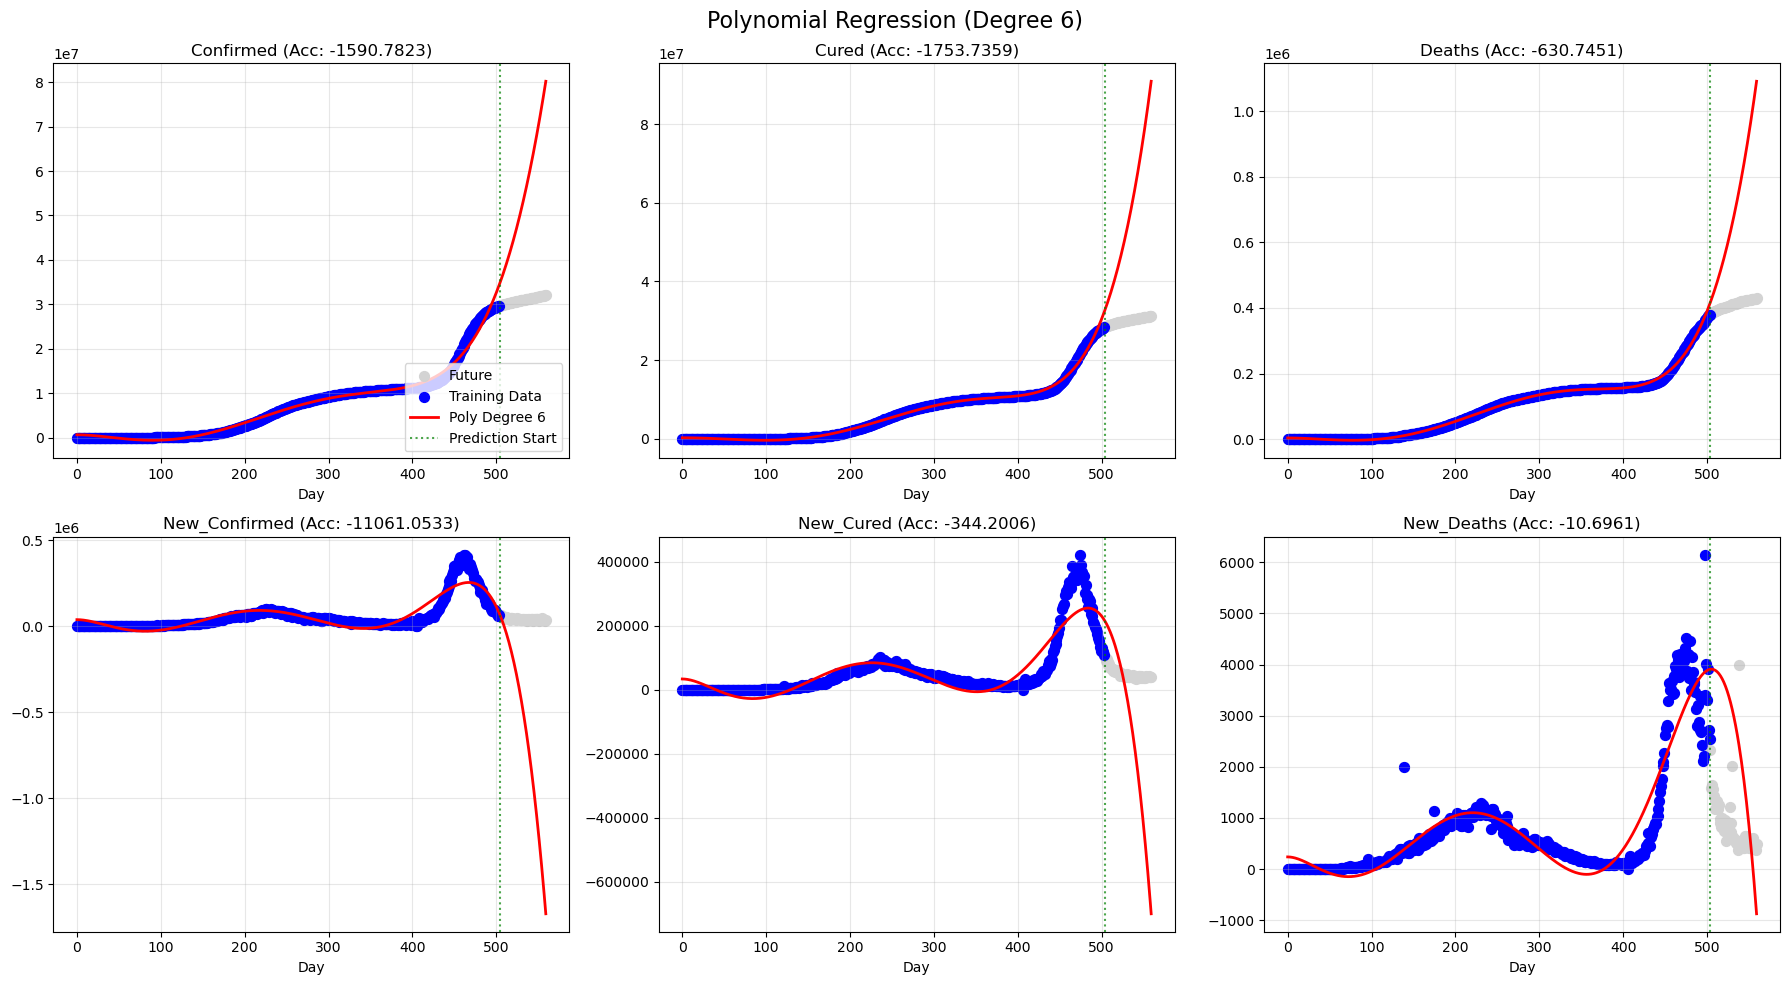

In [9]:
if not df.empty:
    # 1. Setup Polynomial Features
    poly = PolynomialFeatures(degree=degree)

    # 2. Setup Plot Grid (2 Rows, 3 Columns)
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    print(f"--- Polynomial Regression (Degree {degree}) | Train Size: {user_fraction*100:.0f}% ---")
    print(f"{'Target':<15} | {'Accuracy (R2 Score)':<20}")
    print("-" * 45)

    for i, target in enumerate(targets):
        
        # A. Split Data
        n_total = len(df)
        cut_index = int(n_total * user_fraction)
        if cut_index < 2: cut_index = 2
            
        train_df = df.iloc[:cut_index]
        test_df = df.iloc[cut_index:]
        
        # B. Prepare & Transform Data
        X_train_raw = train_df[['Day']]
        X_train_poly = poly.fit_transform(X_train_raw)
        y_train = train_df[target]
        
        # C. Train Model
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        # D. Predict (Whole Timeline)
        X_all_raw = df[['Day']]
        X_all_poly = poly.transform(X_all_raw)
        predictions = model.predict(X_all_poly)
        
        # E. Calculate Accuracy (R2 Score) on the unseen 'Future' data
        score_str = "N/A"
        if len(test_df) > 1:
            X_test_raw = test_df[['Day']]
            X_test_poly = poly.transform(X_test_raw)
            y_test = test_df[target]
            y_pred_test = model.predict(X_test_poly)
            score = r2_score(y_test, y_pred_test)
            score_str = f"{score:.4f}"
            
        print(f"{target:<15} | {score_str:<20}")

        # F. Plotting
        ax = axes[i]
        
        # 1. Plot the "Future" data (light gray)
        ax.scatter(df['Day'], df[target], color='lightgray', s=50, label='Future')
        
        # 2. Plot the Training data (blue)
        ax.scatter(train_df['Day'], train_df[target], color='blue', s=50, label='Training Data')
        
        # 3. Plot the Prediction Curve (red line)
        ax.plot(df['Day'], predictions, color='red', linewidth=2, label=f'Poly Degree {degree}')
        
        # 4. Draw vertical line at split point (The "learning stopped here" point)
        ax.axvline(x=cut_index, color='green', linestyle=':', alpha=0.7, label='Prediction Start')
        
        ax.set_title(f'{target} (Acc: {score_str})')
        ax.set_xlabel('Day')
        ax.grid(True, alpha=0.3)
        
        if i == 0: ax.legend(loc='lower right')

    plt.suptitle(f"Polynomial Regression (Degree {degree})", fontsize=16)
    plt.tight_layout()
    plt.show()